# Movie Search Project Results
This notebook demonstrates how to load movie data, search for movies, and display results using the code from the project.

In [9]:
# Install required packages if not already installed
# !pip install sentence-transformers pandas scikit-learn

# Import required libraries
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

print("All libraries imported successfully!")

All libraries imported successfully!


In [10]:
# Load the movies dataset
df = pd.read_csv('movies.csv')

# Display the dataset
print(f"Dataset loaded successfully! Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Display dataset info
print("\nDataset information:")
print(df.info())

Dataset loaded successfully! Shape: (3, 2)

First few rows:
              title                                               plot
0         Spy Movie  A spy navigates intrigue in Paris to stop a te...
1  Romance in Paris  A couple falls in love in Paris under romantic...
2      Action Flick  A high-octane chase through New York with expl...

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3 non-null      object
 1   plot    3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes
None


In [11]:
# Load the Sentence Transformer model
print("Loading Sentence Transformer model (all-MiniLM-L6-v2)...")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded successfully!")

# Convert movie plots into embeddings
print("\nCreating embeddings for movie plots...")
plot_texts = df['plot'].tolist()
embeddings = model.encode(plot_texts, convert_to_tensor=False)

print(f"Embeddings created successfully!")
print(f"Number of movies: {len(df)}")
print(f"Embedding shape: {embeddings.shape}")
print(f"Embedding dimension: {embeddings.shape[1]}")

Loading Sentence Transformer model (all-MiniLM-L6-v2)...
Model loaded successfully!

Creating embeddings for movie plots...
Embeddings created successfully!
Number of movies: 3
Embedding shape: (3, 384)
Embedding dimension: 384
Model loaded successfully!

Creating embeddings for movie plots...
Embeddings created successfully!
Number of movies: 3
Embedding shape: (3, 384)
Embedding dimension: 384


In [12]:
def search_movies(query, top_n=5):
    """
    Search for movies based on semantic similarity to the query.
    
    Args:
        query (str): The search query
        top_n (int): Number of top results to return (default: 5)
    
    Returns:
        pd.DataFrame: DataFrame with columns: title, plot, similarity
                     sorted by similarity score in descending order
    """
    # Encode the query using the same model
    query_embedding = model.encode([query], convert_to_tensor=False)
    
    # Calculate cosine similarity between query and all movie plots
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    
    # Create results DataFrame
    results = df.copy()
    results['similarity'] = similarities
    
    # Sort by similarity score (descending) and get top_n results
    results = results.sort_values('similarity', ascending=False).head(top_n)
    
    # Reset index for clean output
    results = results.reset_index(drop=True)
    
    return results

print("Search function implemented successfully!")

Search function implemented successfully!


In [13]:
# Test the search function with the specified query
test_query = "spy thriller in Paris"
print(f"Testing search with query: '{test_query}'")

# Get top 3 results
results = search_movies(test_query, top_n=3)

print("\nTop 3 results:")
print(results[['title', 'plot', 'similarity']])

# Display detailed results
print("\nDetailed results:")
for idx, row in results.iterrows():
    print(f"\n{idx + 1}. {row['title']}")
    print(f"   Plot: {row['plot']}")
    print(f"   Similarity Score: {row['similarity']:.4f}")

Testing search with query: 'spy thriller in Paris'

Top 3 results:
              title                                               plot  \
0         Spy Movie  A spy navigates intrigue in Paris to stop a te...   
1  Romance in Paris  A couple falls in love in Paris under romantic...   
2      Action Flick  A high-octane chase through New York with expl...   

   similarity  
0    0.769684  
1    0.388029  
2    0.256777  

Detailed results:

1. Spy Movie
   Plot: A spy navigates intrigue in Paris to stop a terrorist plot.
   Similarity Score: 0.7697

2. Romance in Paris
   Plot: A couple falls in love in Paris under romantic circumstances.
   Similarity Score: 0.3880

3. Action Flick
   Plot: A high-octane chase through New York with explosions.
   Similarity Score: 0.2568


In [14]:
# Test with different queries
test_queries = [
    "romantic love story",
    "action and explosions",
    "Paris adventure",
    "thriller movie"
]

for query in test_queries:
    print(f"\n{'='*50}")
    print(f"Query: '{query}'")
    print(f"{'='*50}")
    
    results = search_movies(query, top_n=2)
    
    for idx, row in results.iterrows():
        print(f"\n{idx + 1}. {row['title']}")
        print(f"   Plot: {row['plot']}")
        print(f"   Similarity: {row['similarity']:.4f}")


Query: 'romantic love story'

1. Romance in Paris
   Plot: A couple falls in love in Paris under romantic circumstances.
   Similarity: 0.5539

2. Action Flick
   Plot: A high-octane chase through New York with explosions.
   Similarity: 0.1436

Query: 'action and explosions'

1. Action Flick
   Plot: A high-octane chase through New York with explosions.
   Similarity: 0.5086

2. Spy Movie
   Plot: A spy navigates intrigue in Paris to stop a terrorist plot.
   Similarity: 0.2299

Query: 'Paris adventure'

1. Spy Movie
   Plot: A spy navigates intrigue in Paris to stop a terrorist plot.
   Similarity: 0.4705

2. Romance in Paris
   Plot: A couple falls in love in Paris under romantic circumstances.
   Similarity: 0.3972

Query: 'thriller movie'

1. Action Flick
   Plot: A high-octane chase through New York with explosions.
   Similarity: 0.3501

2. Spy Movie
   Plot: A spy navigates intrigue in Paris to stop a terrorist plot.
   Similarity: 0.3306


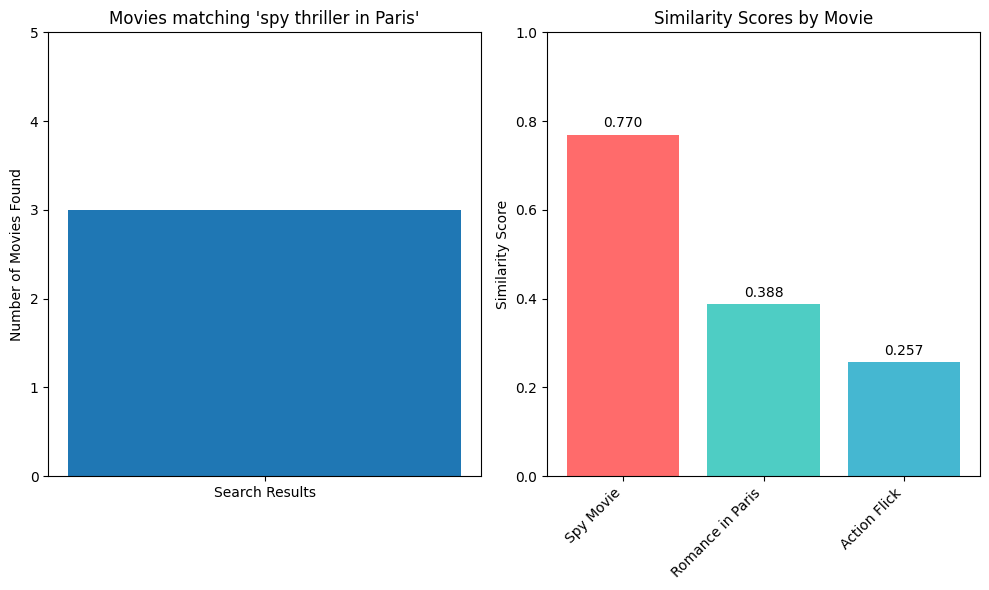


Search Results for: 'spy thriller in Paris'
           title                                                          plot  similarity
       Spy Movie   A spy navigates intrigue in Paris to stop a terrorist plot.    0.769684
Romance in Paris A couple falls in love in Paris under romantic circumstances.    0.388029
    Action Flick         A high-octane chase through New York with explosions.    0.256777


In [15]:
import matplotlib.pyplot as plt

# Get search results for visualization
search_query = "spy thriller in Paris"
search_results = search_movies(search_query, top_n=3)

# Create the visualization
plt.figure(figsize=(10, 6))

# Bar chart showing number of results
plt.subplot(1, 2, 1)
plt.bar(['Search Results'], [len(search_results)])
plt.ylabel('Number of Movies Found')
plt.title(f"Movies matching '{search_query}'")
plt.ylim(0, 5)

# Bar chart showing similarity scores
plt.subplot(1, 2, 2)
movie_titles = search_results['title'].tolist()
similarity_scores = search_results['similarity'].tolist()

plt.bar(movie_titles, similarity_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.ylabel('Similarity Score')
plt.title('Similarity Scores by Movie')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for i, v in enumerate(similarity_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the results table
print(f"\nSearch Results for: '{search_query}'")
print("=" * 60)
print(search_results[['title', 'plot', 'similarity']].to_string(index=False))

In [21]:
import sys
import os

# Add current directory to path
sys.path.append(os.getcwd())

print("Running Movie Search Tests...")
print("=" * 40)

# Import the test module
import tests.test_movie_search

# Run the tests manually
test_instance = tests.test_movie_search.TestMovieSearch()

# Run each test method
test_methods = [
    'test_search_movies_output_format',
    'test_search_movies_top_n', 
    'test_search_movies_similarity_range',
    'test_search_movies_relevance'
]

for method_name in test_methods:
    print(f"\nRunning {method_name}...")
    try:
        getattr(test_instance, method_name)()
        print(f"✅ {method_name} PASSED")
    except Exception as e:
        print(f"❌ {method_name} FAILED: {e}")

print("\nAll tests completed!")

Running Movie Search Tests...

Running test_search_movies_output_format...
✅ test_search_movies_output_format PASSED

Running test_search_movies_top_n...
✅ test_search_movies_top_n PASSED

Running test_search_movies_similarity_range...
✅ test_search_movies_similarity_range PASSED

Running test_search_movies_relevance...
✅ test_search_movies_relevance PASSED

All tests completed!
